# Simulación de nuestra cocina

In [18]:
import graph
import math
from objects import Client, Restaurant
from random_variables import Ed

def a():
    lda = 0.2
    lda_critic = 0.4

    t = 0               # minute of day
    t_max = 660         # total minutes of a day: 10am to 9pm, 11h * 60m = 660m
    ta = Ed(lda) + 1    # minute of next client arrive using lda
    td1 = 661           # minimum departure time in kitchen of case 1
    td2 = 661           # minimum departure time in kitchen of case 2
    rest1 = Restaurant()
    rest2 = Restaurant(True)

    while True:
        flag = 0
        if ta == min(ta, td1, td2) and ta <= t_max:
            flag = 1
            t = ta
            client = Client(t)
            client_clone = client.clone()
            td1 = rest1.new_client_event(client)
            td2 = rest2.new_client_event(client_clone)
            if (90 <= t <= 210) or (420 <= t <= 540):   # elevate frequency in critical time of day
                ta = t + Ed(lda_critic) + 1
            else:                                       # normal frequency of people
                ta = t + Ed(lda) + 1
            if ta> t_max:
                ta = math.inf
        if td1 < ta and td1 <= td2:
            flag = 1
            t = td1
            td1 = rest1.petition_completed_event()
        if td2 < ta and td2 < td1:
            flag = 1
            t = td2
            td2 = rest2.petition_completed_event()

        if flag == 0:
            break
    return rest1, rest2
rest1, rest2 = a()

#### Comprobemos la selección de la orden para los clientes y el tiempo de cada orden

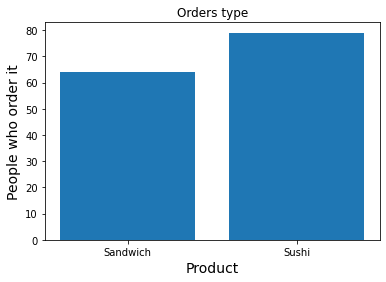

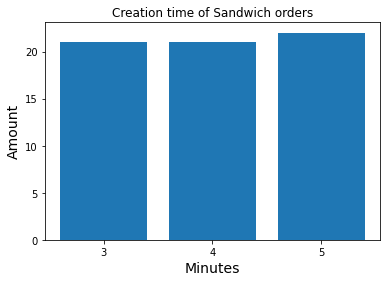

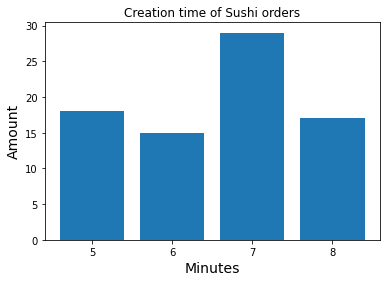

In [19]:
graph.order_type(rest1)
graph.sandwich_orders_minutes(rest1)
graph.sushi_orders_minutes(rest1)

#### Comprobemos el uso de chefs en las cocinas a lo largo del tiempo en cada restaurant

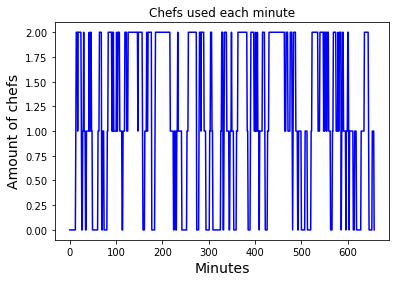

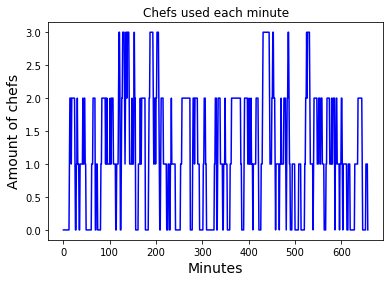

In [20]:
graph.chefs_used_each_minute(rest1)
graph.chefs_used_each_minute(rest2)

#### Veamos cuanto tiempo esperó cada cliente antes de ser atendido en cada restaurant

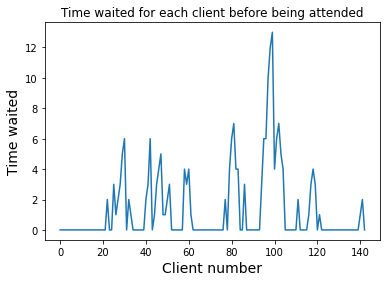

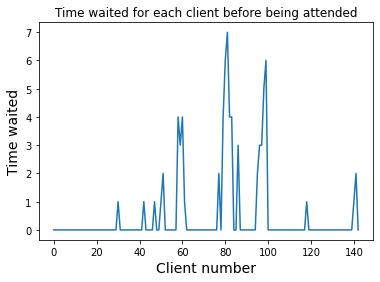

In [21]:
graph.time_waiting_of_each_client_before_attended(rest1)
graph.time_waiting_of_each_client_before_attended(rest2)

#### Veamos ahora cuantos clientes habian esperando ser atendidos en cada minuto

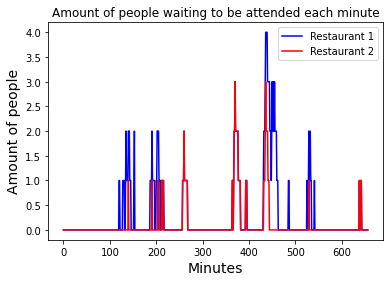

In [22]:
graph.people_in_queue_each_minute(rest1, rest2)

#### Veamos los porcientos de personas que esperaron más de 5 minutos por ser atendidas en ambos restaurantes

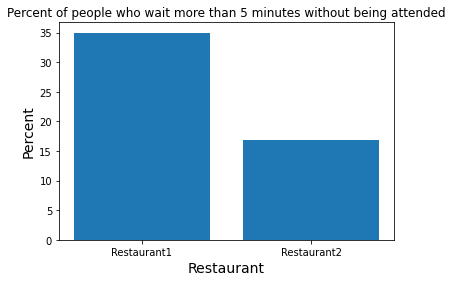

In [23]:
graph.more_than_5min_waiting(rest1, rest2)

#### Finalmente 10,000 simulaciones para conocer como se comporta la diferencia

In [ ]:
import matplotlib.pyplot as plt

percent1 = 0
percent2 = 0
for i in range(10000):
    rest1, rest2 = a()
    
    amount = 0
    for client in rest1.client_list:
        if client.departure - client.petition_time - client.arrive:
            amount += 1
    percent1 += (amount/len(rest1.client_list)) * 100

    amount = 0
    for client in rest2.client_list:
        if client.departure - client.petition_time - client.arrive:
            amount += 1
    percent2 += (amount / len(rest1.client_list)) * 100
    
    
restaurants = ['Restaurant1', 'Restaurant2']
more_than_5min = [percent1/10000, percent2/10000]

xAxis = [i + 0.5 for i, _ in enumerate(restaurants)]

plt.bar(xAxis, more_than_5min)
plt.title('Percent of people who wait more than 5 minutes without being attended')
plt.xlabel('Restaurant', fontsize=14)
plt.ylabel('Percent', fontsize=14)
plt.xticks([i+0.5 for i, _ in enumerate(restaurants)], restaurants)

# plt.savefig('img/percent_10000cases_2_4.png', bbox_inches='tight')
plt.show()